[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/solutions/Practica4_winedata_answers.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [2]:
# Fetch the dataset using the raw GitHub URL.
#!curl --remote-name \
#     -H 'Accept: application/vnd.github.v3.raw' \
#     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [5]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

C:\Users\beyon\AppData\Local\Temp\ipykernel_16460\2573261857.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x[:10], y=y[:10], palette="hls")


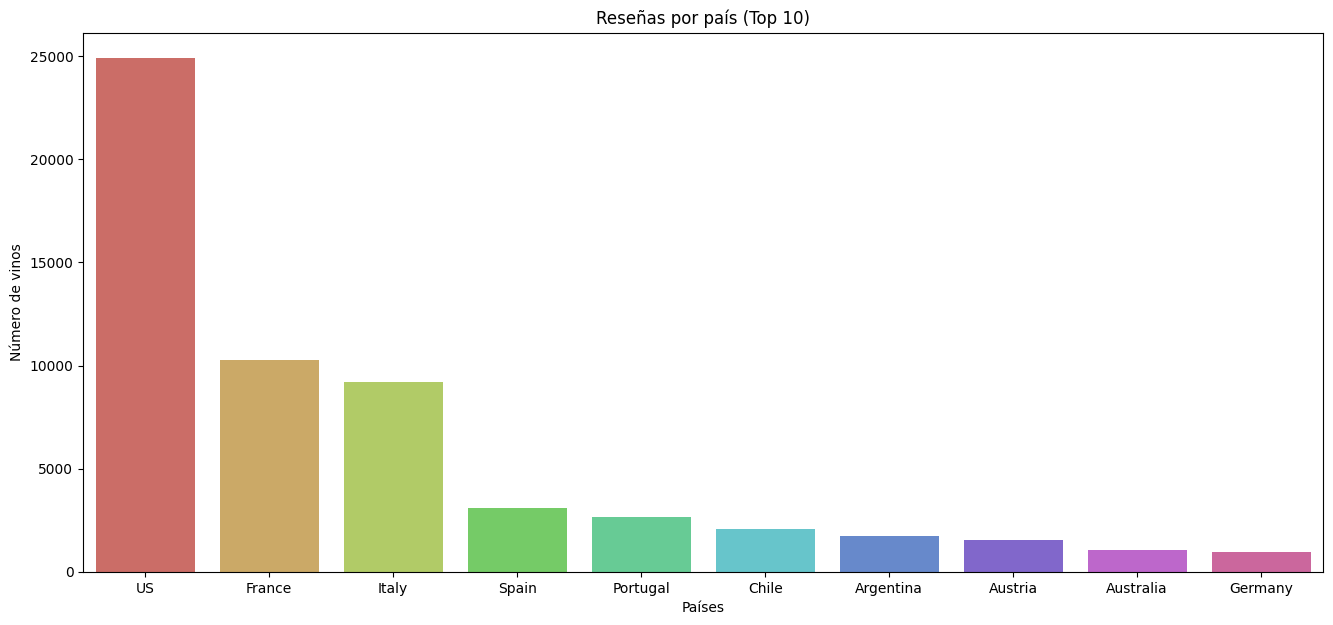

In [6]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(16,7))
# Define colors for each bar
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Create the bar plot with specified colors
sns.barplot(x=x[:10], y=y[:10], palette="hls")

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [7]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

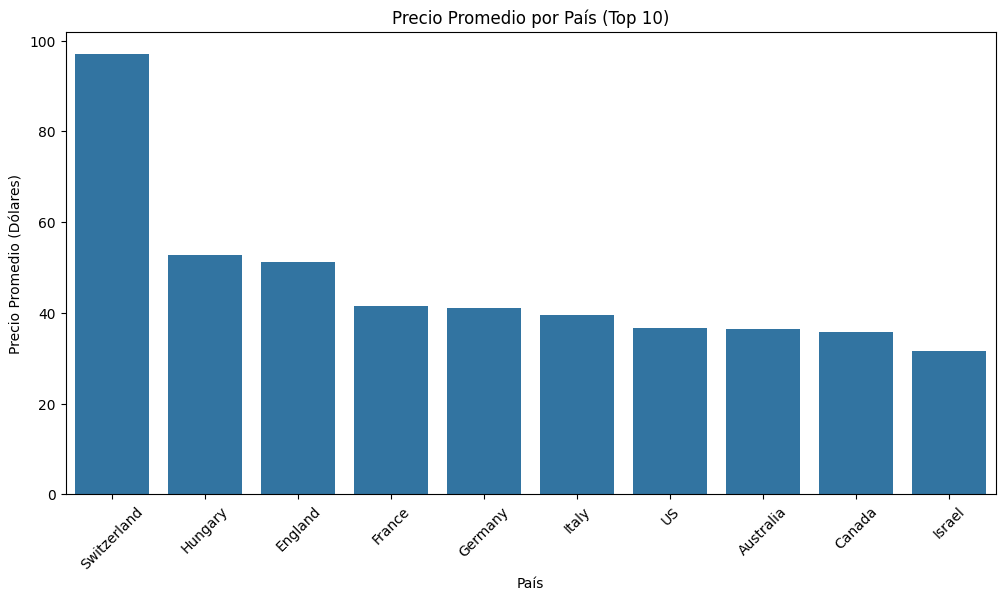

variety
Abouriou       75.000000
Agiorgitiko    24.343750
Aglianico      39.071429
Aidani         27.000000
Airen           8.500000
                 ...    
Zinfandel      30.066182
Zlahtina       13.000000
Zweigelt       22.680556
Çalkarası      19.000000
Žilavka        15.000000
Name: price, Length: 580, dtype: float64


In [8]:
# Suponiendo que tienes un DataFrame llamado df con las columnas proporcionadas

# 1. Calcular el precio promedio por país
precio_promedio_por_pais = df.groupby('country')['price'].mean()

# 2. Ordenar los resultados en orden descendente según el precio promedio
precio_promedio_por_pais = precio_promedio_por_pais.sort_values(ascending=False)

# 3. Seleccionar los 10 primeros países
top_10_paises = precio_promedio_por_pais.head(10)

# 4. Graficar los resultados en una gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_paises.index, y=top_10_paises.values)
plt.xlabel('País')
plt.ylabel('Precio Promedio (Dólares)')
plt.title('Precio Promedio por País (Top 10)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

# ¿Cuál sería el precio promedio por variedad?
precio_promedio_por_variedad = df.groupby('variety')['price'].mean()
print(precio_promedio_por_variedad)


#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

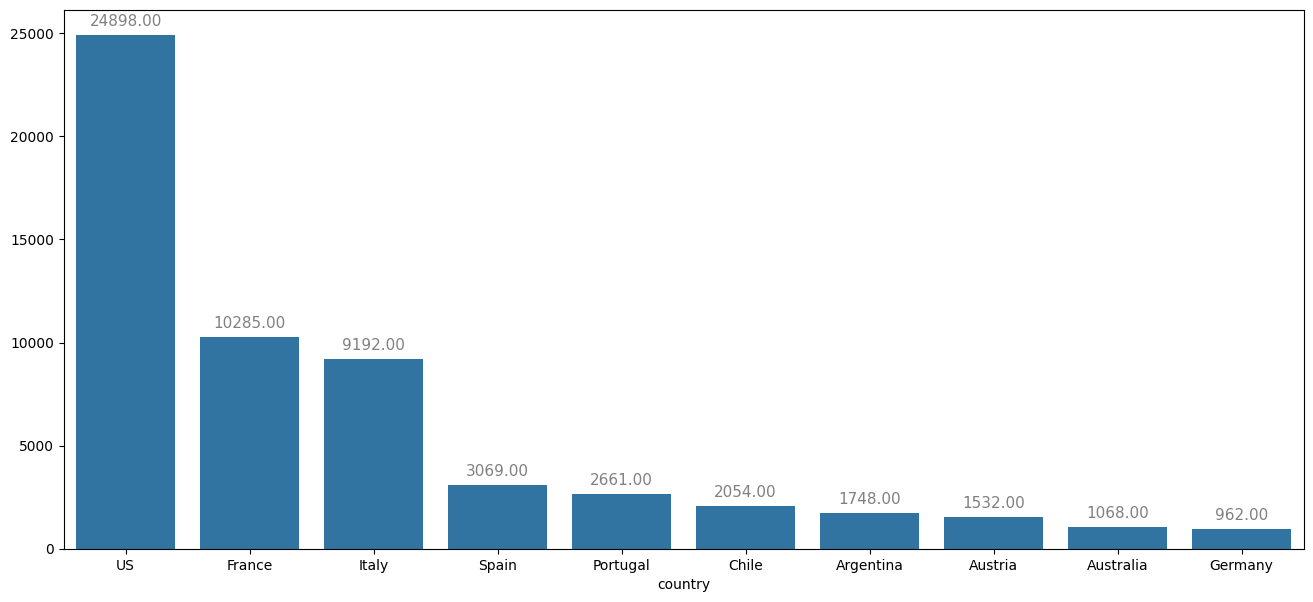

In [9]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

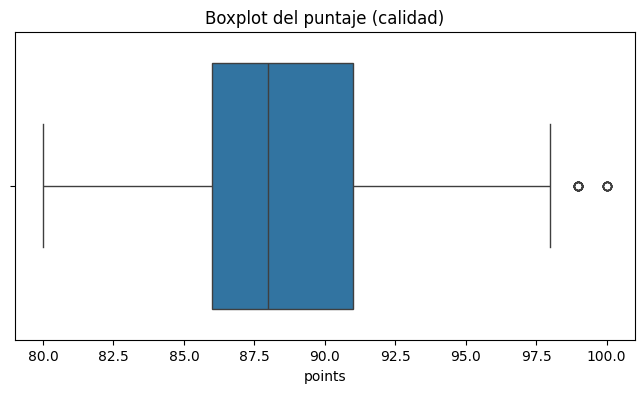

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

C:\Users\beyon\AppData\Local\Temp\ipykernel_16460\3268885597.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  promedios = df.groupby('country').apply(lambda x: x['points'].mean() / x['price'].mean())


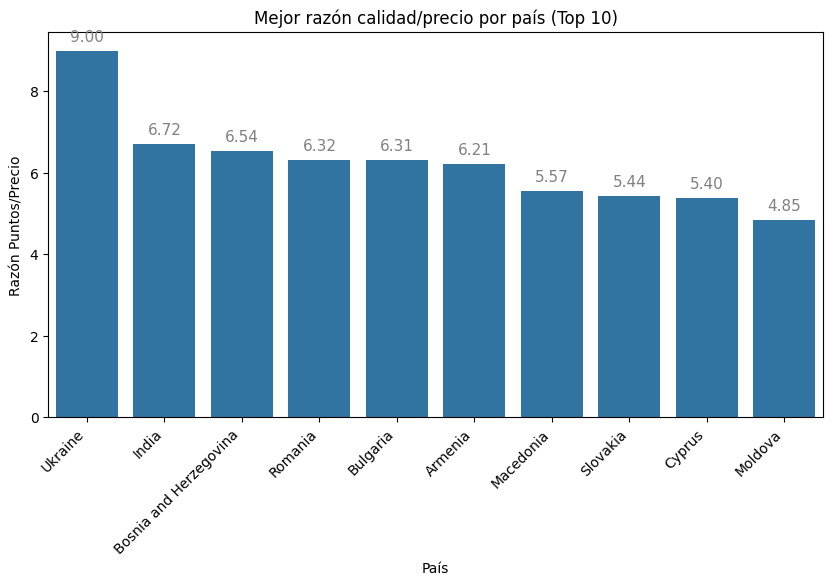

In [11]:
plt.figure(figsize=(10, 5))

# 1. Calcular la razón calidad/precio por país
promedios = df.groupby('country').apply(lambda x: x['points'].mean() / x['price'].mean())

# 2. Ordenar los resultados en orden descendente según la razón calidad/precio
promedios = promedios.sort_values(ascending=False)

# 3. Seleccionar los 10 primeros países
top_10_paises = promedios.head(10)

# 4. Graficar los resultados en una gráfica de barras
ax = sns.barplot(x=top_10_paises.index, y=top_10_paises.values)
plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Razón Puntos/Precio")

# Añadir etiquetas con los valores en cada barra
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')

plt.show()


### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

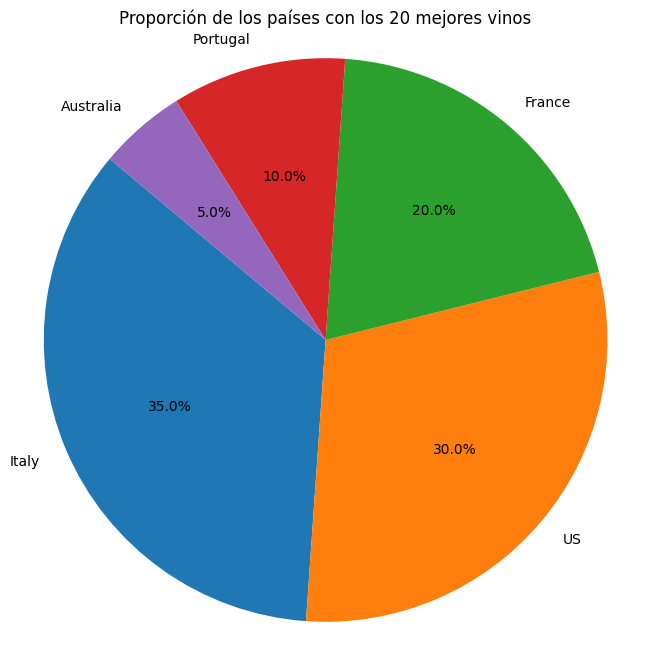

In [12]:
# 1. Ordenar los vinos según su puntuación en orden descendente
top_vinos = df.nlargest(20, 'points')

# 2. Seleccionar los primeros 20 vinos con la mejor puntuación
top_vinos_paises = top_vinos['country']

# 3. Obtener los países a los que pertenecen estos vinos
conteo_paises = top_vinos_paises.value_counts()

# 4. Graficar la proporción de los países en una gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_paises, labels=conteo_paises.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de los países con los 20 mejores vinos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [13]:
#TU CODIGO
variedades = df['variety'].value_counts().head(10)
variedades

variety
Pinot Noir                  6096
Chardonnay                  5343
Cabernet Sauvignon          4353
Red Blend                   4179
Bordeaux-style Red Blend    3164
Riesling                    2406
Sauvignon Blanc             2344
Syrah                       1900
Rosé                        1590
Merlot                      1412
Name: count, dtype: int64

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [14]:
#TU CODIGO
bodegas = df['winery'].value_counts().head(10)
bodegas

winery
Georges Duboeuf          109
Wines & Winemakers       107
Testarossa                97
Louis Latour              87
Chateau Ste. Michelle     86
Williams Selyem           86
DFJ Vinhos                86
Concha y Toro             78
Gary Farrell              74
Lynmar                    72
Name: count, dtype: int64

### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [15]:
# Paso 1: Filtrar el DataFrame original
top_variedades = df['variety'].value_counts().head(10).index.tolist()
top_bodegas = df['winery'].value_counts().head(20).index.tolist()
filtered_df = df[df['variety'].isin(top_variedades) & df['winery'].isin(top_bodegas)]

# Paso 2: Seleccionar solo las columnas relevantes
relevant_columns = ['country', 'winery', 'variety', 'points', 'price']
filtered_df = filtered_df[relevant_columns]

# Paso 3: Calcular el valor de puntos/precio
filtered_df['points/price'] = filtered_df['points'] / filtered_df['price']

# Paso 4: Cambiar el nombre de la bodega para que incluya su país de origen
filtered_df['winery'] = filtered_df['country'] + ' - ' + filtered_df['winery']

# Paso 5: Ordenar los datos por nombre de país, variedad y bodega
filtered_df = filtered_df.sort_values(by=['country', 'variety', 'winery'], ascending=True)

# Almacenar el nuevo DataFrame en la variable p_v
p_v = filtered_df.copy()


#### &#9758; Observa la relación puntos-precio por país

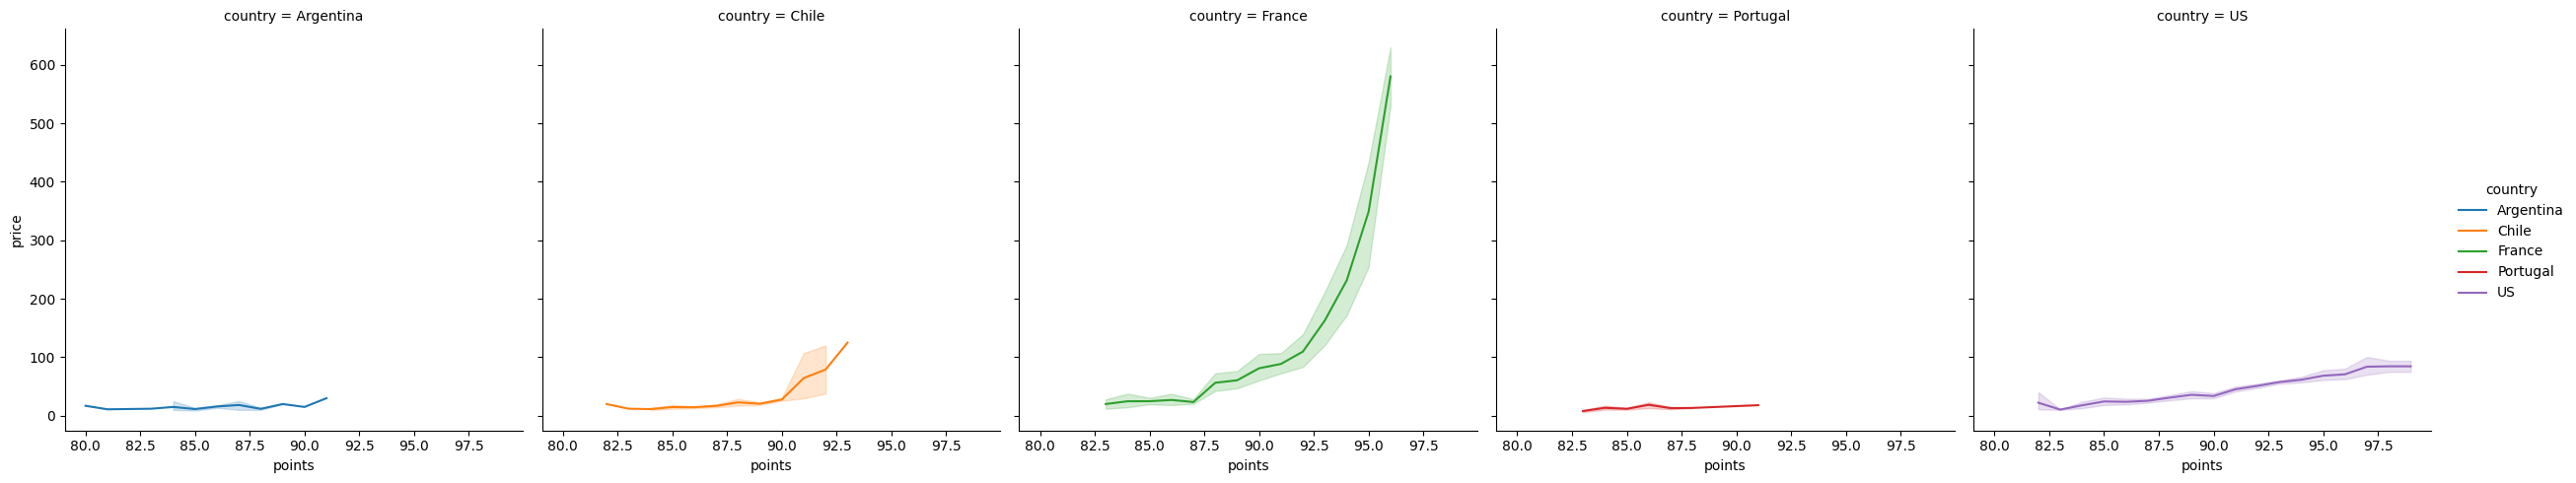

In [16]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

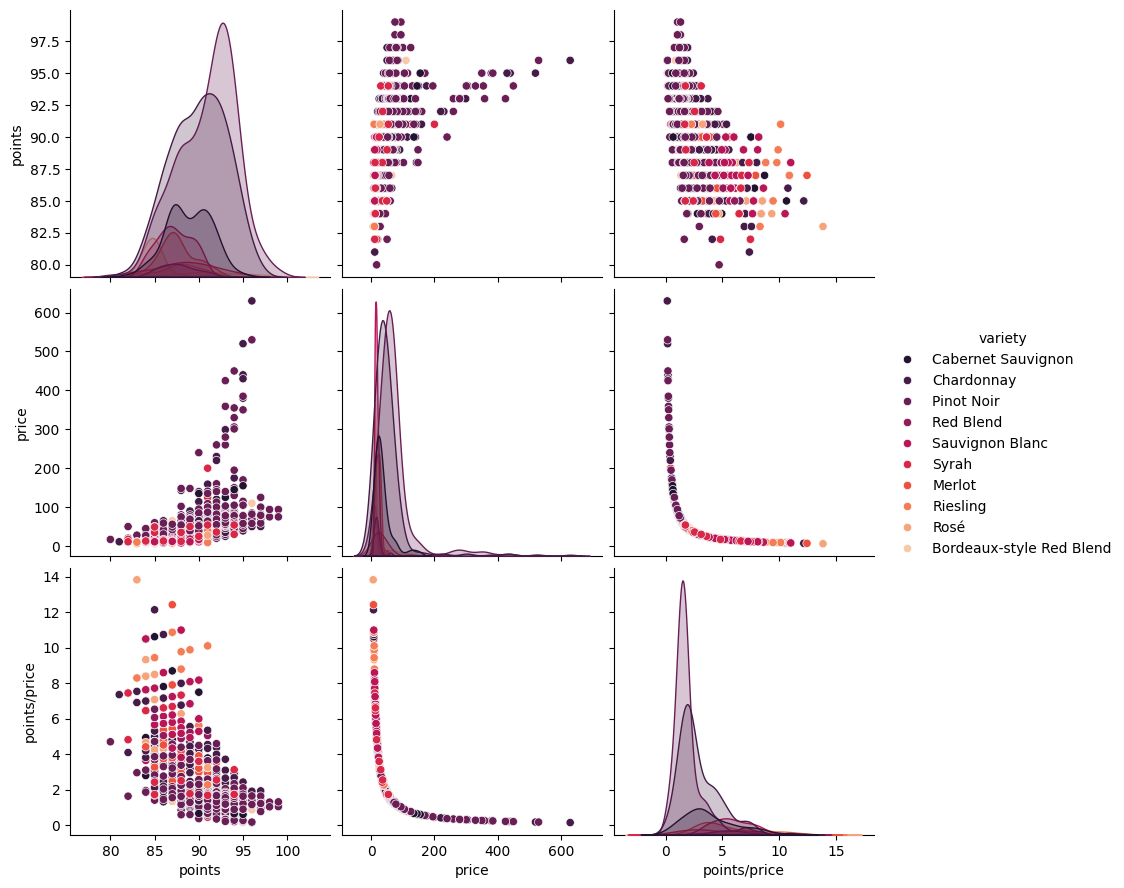

In [17]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

1.   Elemento de la lista
2.   Elemento de la lista



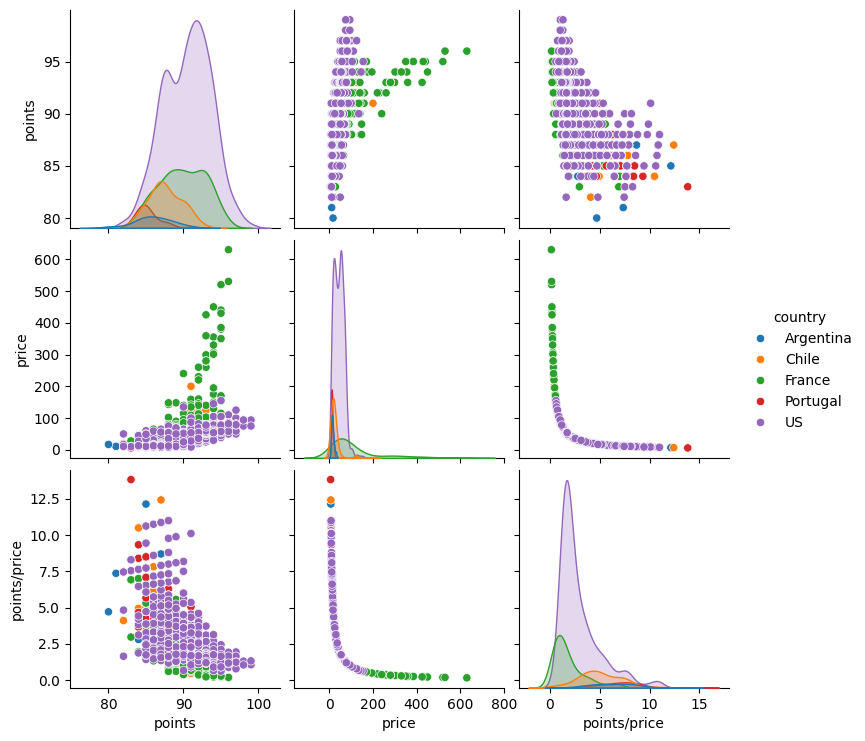

In [18]:
# Crear las distribuciones por pares en función del país
sns.pairplot(p_v, hue='country')
plt.show()


#### &#9758; Observa las distribuciones por pares en función de la bodega.

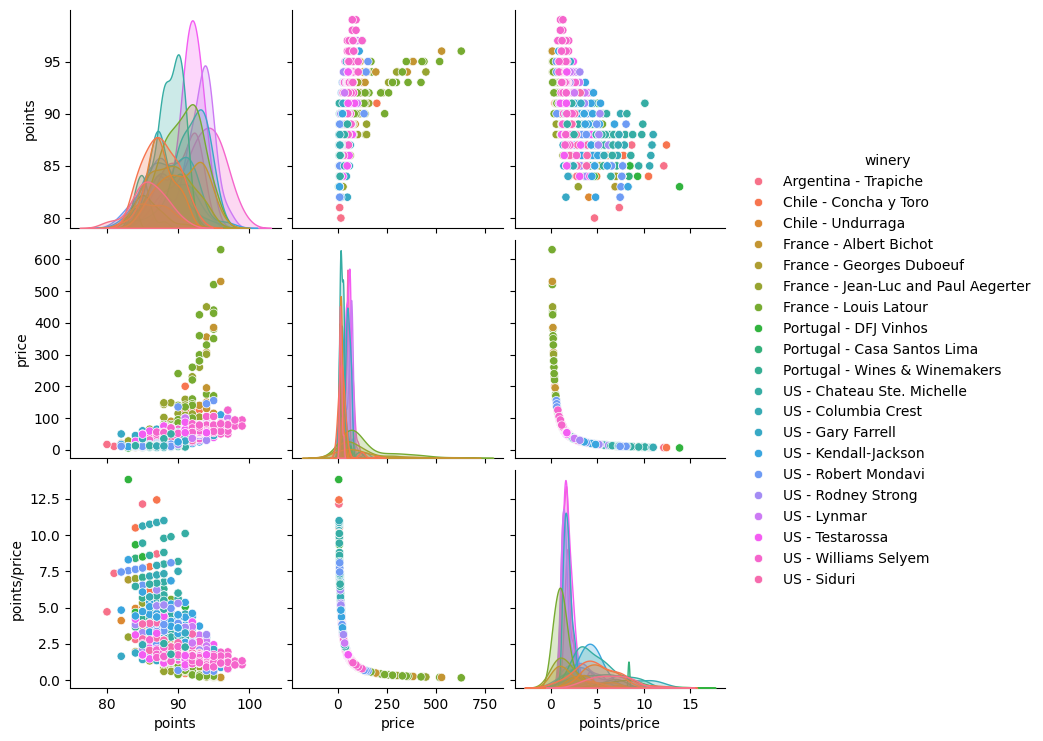

In [19]:
# Crear las distribuciones por pares en función de la bodega
sns.pairplot(p_v, hue='winery')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

> Agregar bloque entrecomillado



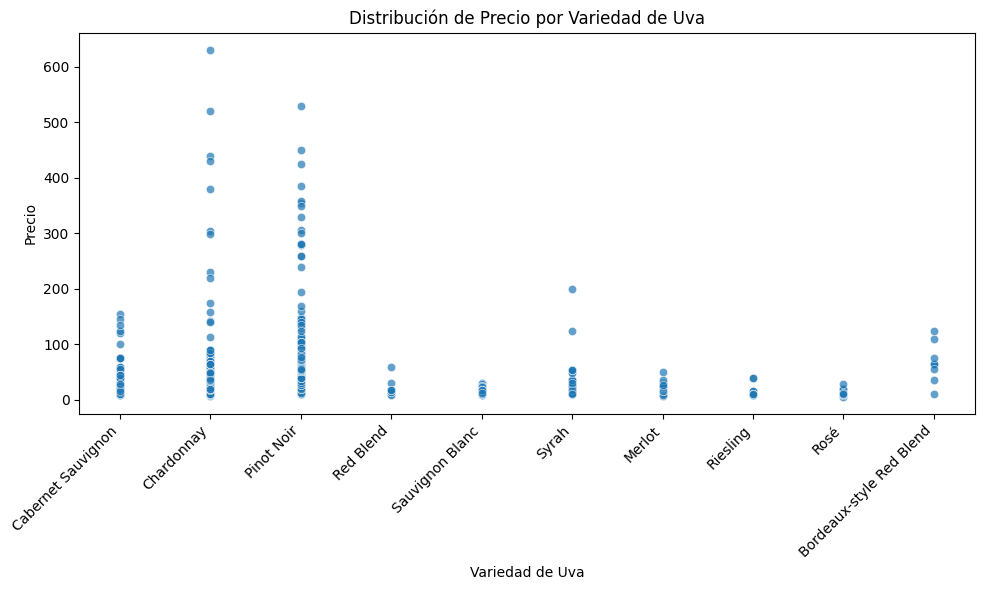

In [20]:
# Crear un gráfico de dispersión de precio por variedad de uva
plt.figure(figsize=(10, 6))
sns.scatterplot(data=p_v, x='variety', y='price', alpha=0.7)
plt.xlabel('Variedad de Uva')
plt.ylabel('Precio')
plt.title('Distribución de Precio por Variedad de Uva')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

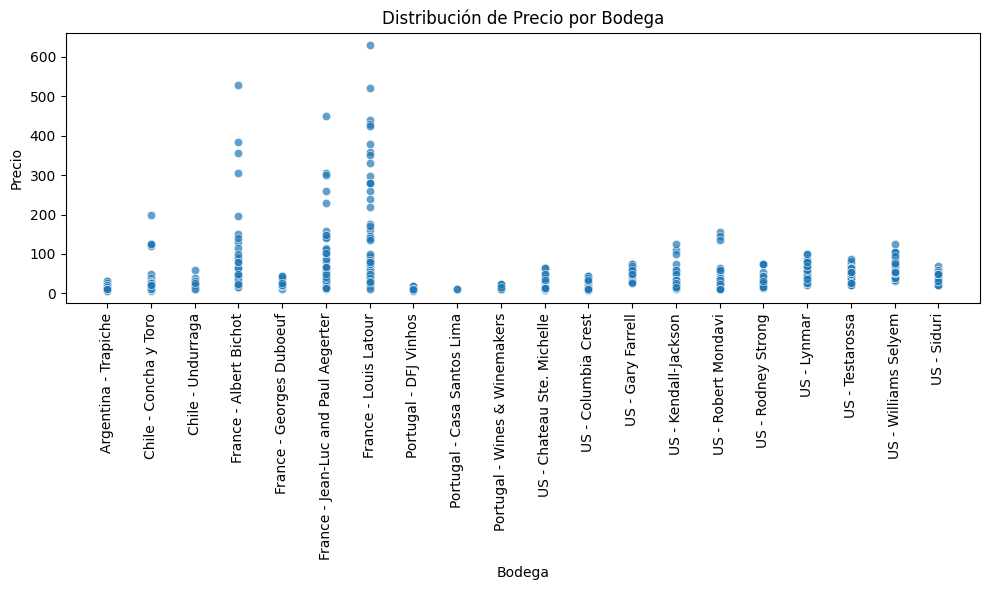

In [21]:
# Crear un gráfico de dispersión de precio por bodega
plt.figure(figsize=(10, 6))
sns.scatterplot(data=p_v, x='winery', y='price', alpha=0.7)
plt.xlabel('Bodega')
plt.ylabel('Precio')
plt.title('Distribución de Precio por Bodega')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

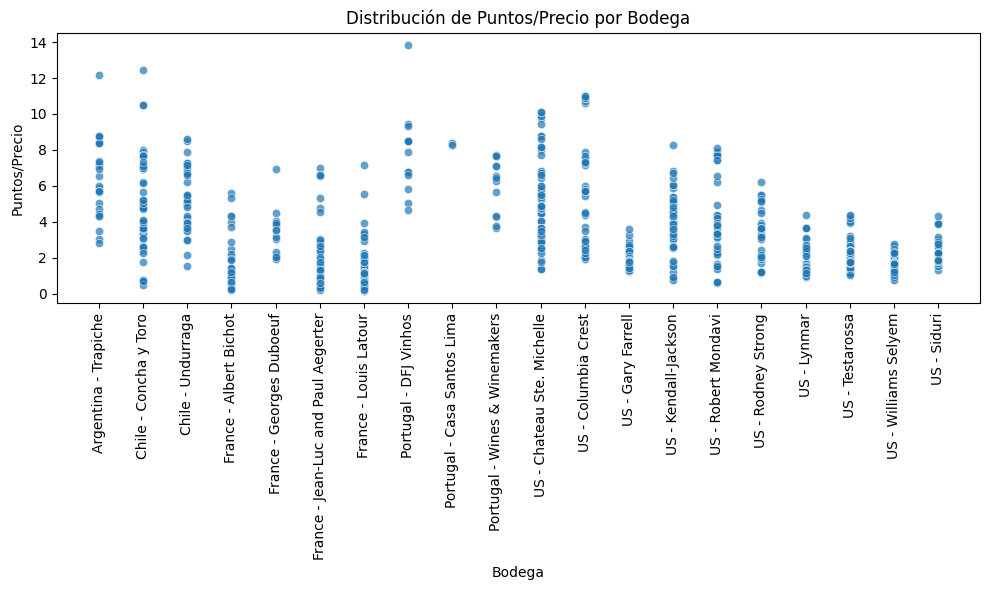

In [22]:
# Crear un gráfico de dispersión de puntos/precio por bodega
plt.figure(figsize=(10, 6))
sns.scatterplot(data=p_v, x='winery', y='points/price', alpha=0.7)
plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')
plt.title('Distribución de Puntos/Precio por Bodega')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

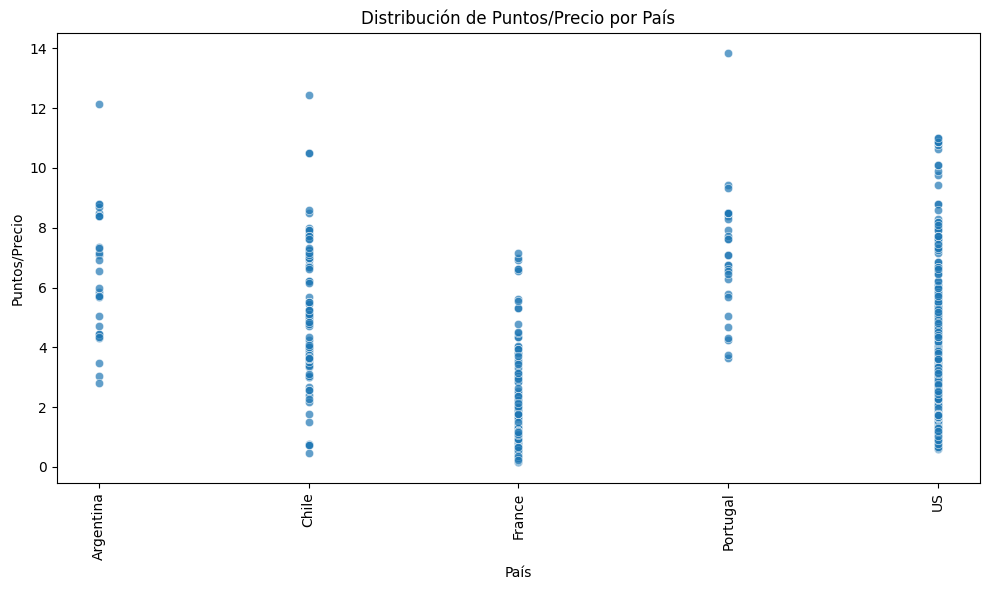

In [23]:
# Crear un gráfico de dispersión de puntos/precio por país
plt.figure(figsize=(10, 6))
sns.scatterplot(data=p_v, x='country', y='points/price', alpha=0.7)
plt.xlabel('País')
plt.ylabel('Puntos/Precio')
plt.title('Distribución de Puntos/Precio por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [24]:
# Suponiendo que 'vinosMX' es el DataFrame que contiene los datos de vinos de México

# Renombrar la columna 'bodega' en 'vinosMX' para que coincida con la columna en 'p_v'
vinosMX = vinosMX.rename(columns={'bodega': 'winery'})

# Eliminar la columna de descripción si existe en 'vinosMX'
if 'description' in vinosMX.columns:
    vinosMX = vinosMX.drop(columns=['description'])

# Unir las tablas utilizando la columna 'country' como clave de unión
df3 = pd.merge(p_v, vinosMX, on='country', how='outer')

# Mostrar la tabla completa
print(df3)


        country              winery_x           variety_x  points_x  price_x  \
0     Argentina  Argentina - Trapiche  Cabernet Sauvignon      84.0     10.0   
1     Argentina  Argentina - Trapiche  Cabernet Sauvignon      88.0     15.0   
2     Argentina  Argentina - Trapiche  Cabernet Sauvignon      90.0     15.0   
3     Argentina  Argentina - Trapiche  Cabernet Sauvignon      88.0     10.0   
4     Argentina  Argentina - Trapiche  Cabernet Sauvignon      91.0     30.0   
...         ...                   ...                 ...       ...      ...   
1024         US       US - Testarossa               Syrah      85.0     49.0   
1025         US       US - Testarossa               Syrah      91.0     54.0   
1026         US       US - Testarossa               Syrah      94.0     54.0   
1027         US       US - Testarossa               Syrah      94.0     54.0   
1028        NaN                   NaN     Sauvignon Blanc      87.0     12.0   

      points/price winery_y variety_y  

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [25]:
# Paso 1: Filtrar el DataFrame para incluir solo los vinos de México
vinos_mexico = df3[df3['country'] == 'Mexico']

# Paso 2: Calcular los valores de points/price
vinos_mexico['points/price'] = vinos_mexico['points_y'] / vinos_mexico['price_y']

# Paso 3: Mostrar el resultado
print(vinos_mexico[['country', 'winery_y', 'variety_y', 'points_y', 'price_y', 'points/price']])


    country                               winery_y  \
334  Mexico                             L.A. Cetto   
335  Mexico                            Monte Xanic   
336  Mexico                             L.A. Cetto   
337  Mexico                            Cava Aragon   
338  Mexico                             L.A. Cetto   
339  Mexico                     Hacienda La Lomita   
340  Mexico                            Monte Xanic   
341  Mexico                            Tres Valles   
342  Mexico  Unión de Productores del Valle (UPVG)   
343  Mexico                            Monte Xanic   
344  Mexico                   Vinicola Fraternidad   
345  Mexico                           Vinos Magbel   
346  Mexico                                Möebius   
347  Mexico                        Vinicola Urbana   
348  Mexico                              Vena Cava   
349  Mexico                            Monte Xanic   
350  Mexico                         Viñas de Garza   
351  Mexico                 

C:\Users\beyon\AppData\Local\Temp\ipykernel_16460\4141333563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinos_mexico['points/price'] = vinos_mexico['points_y'] / vinos_mexico['price_y']


#### &#9758; Observa la relación puntos-precio por país

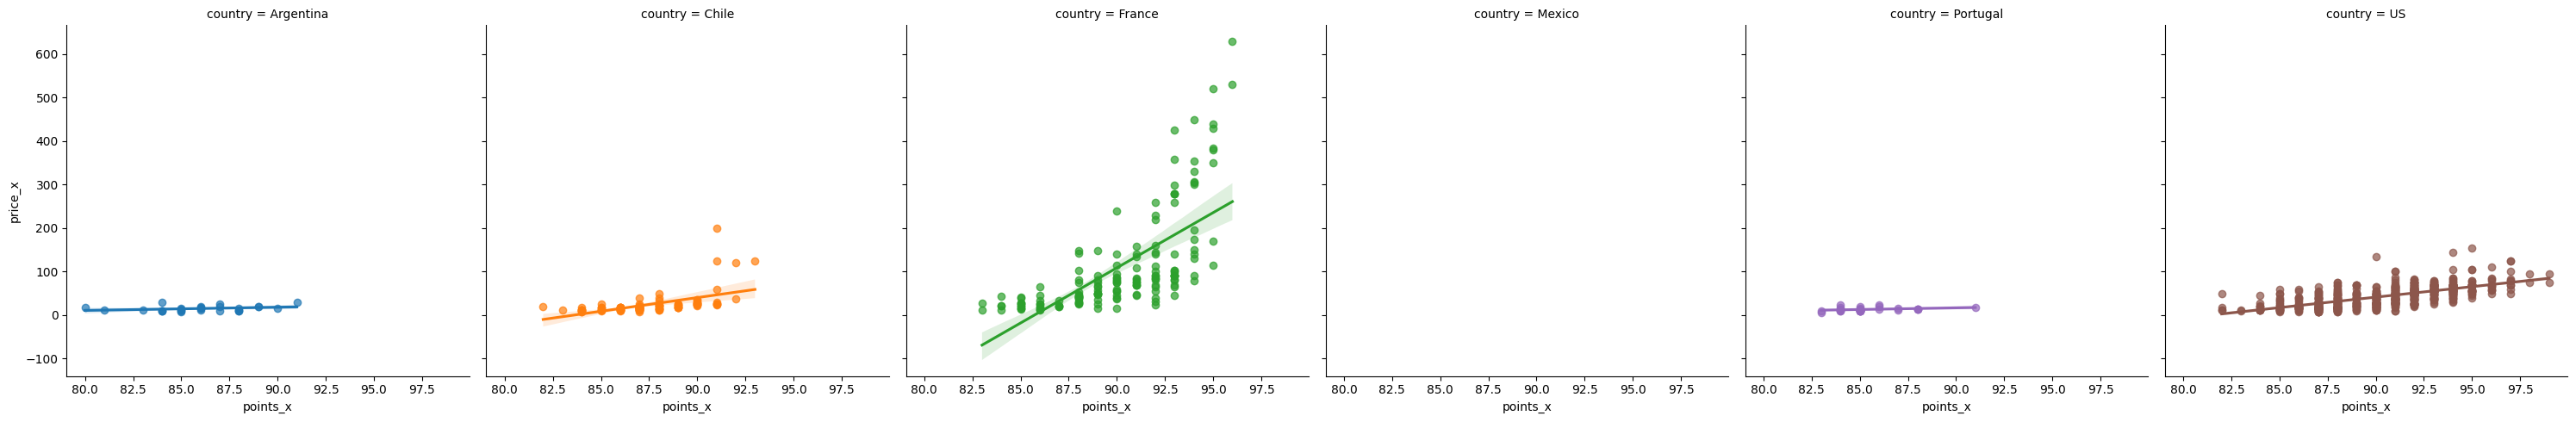

In [26]:
# Crear un gráfico de dispersión con líneas de regresión para cada país
sns.lmplot(x="points_x", y="price_x", hue="country", col='country', data=df3, scatter_kws={'alpha':0.7})
plt.show()


#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

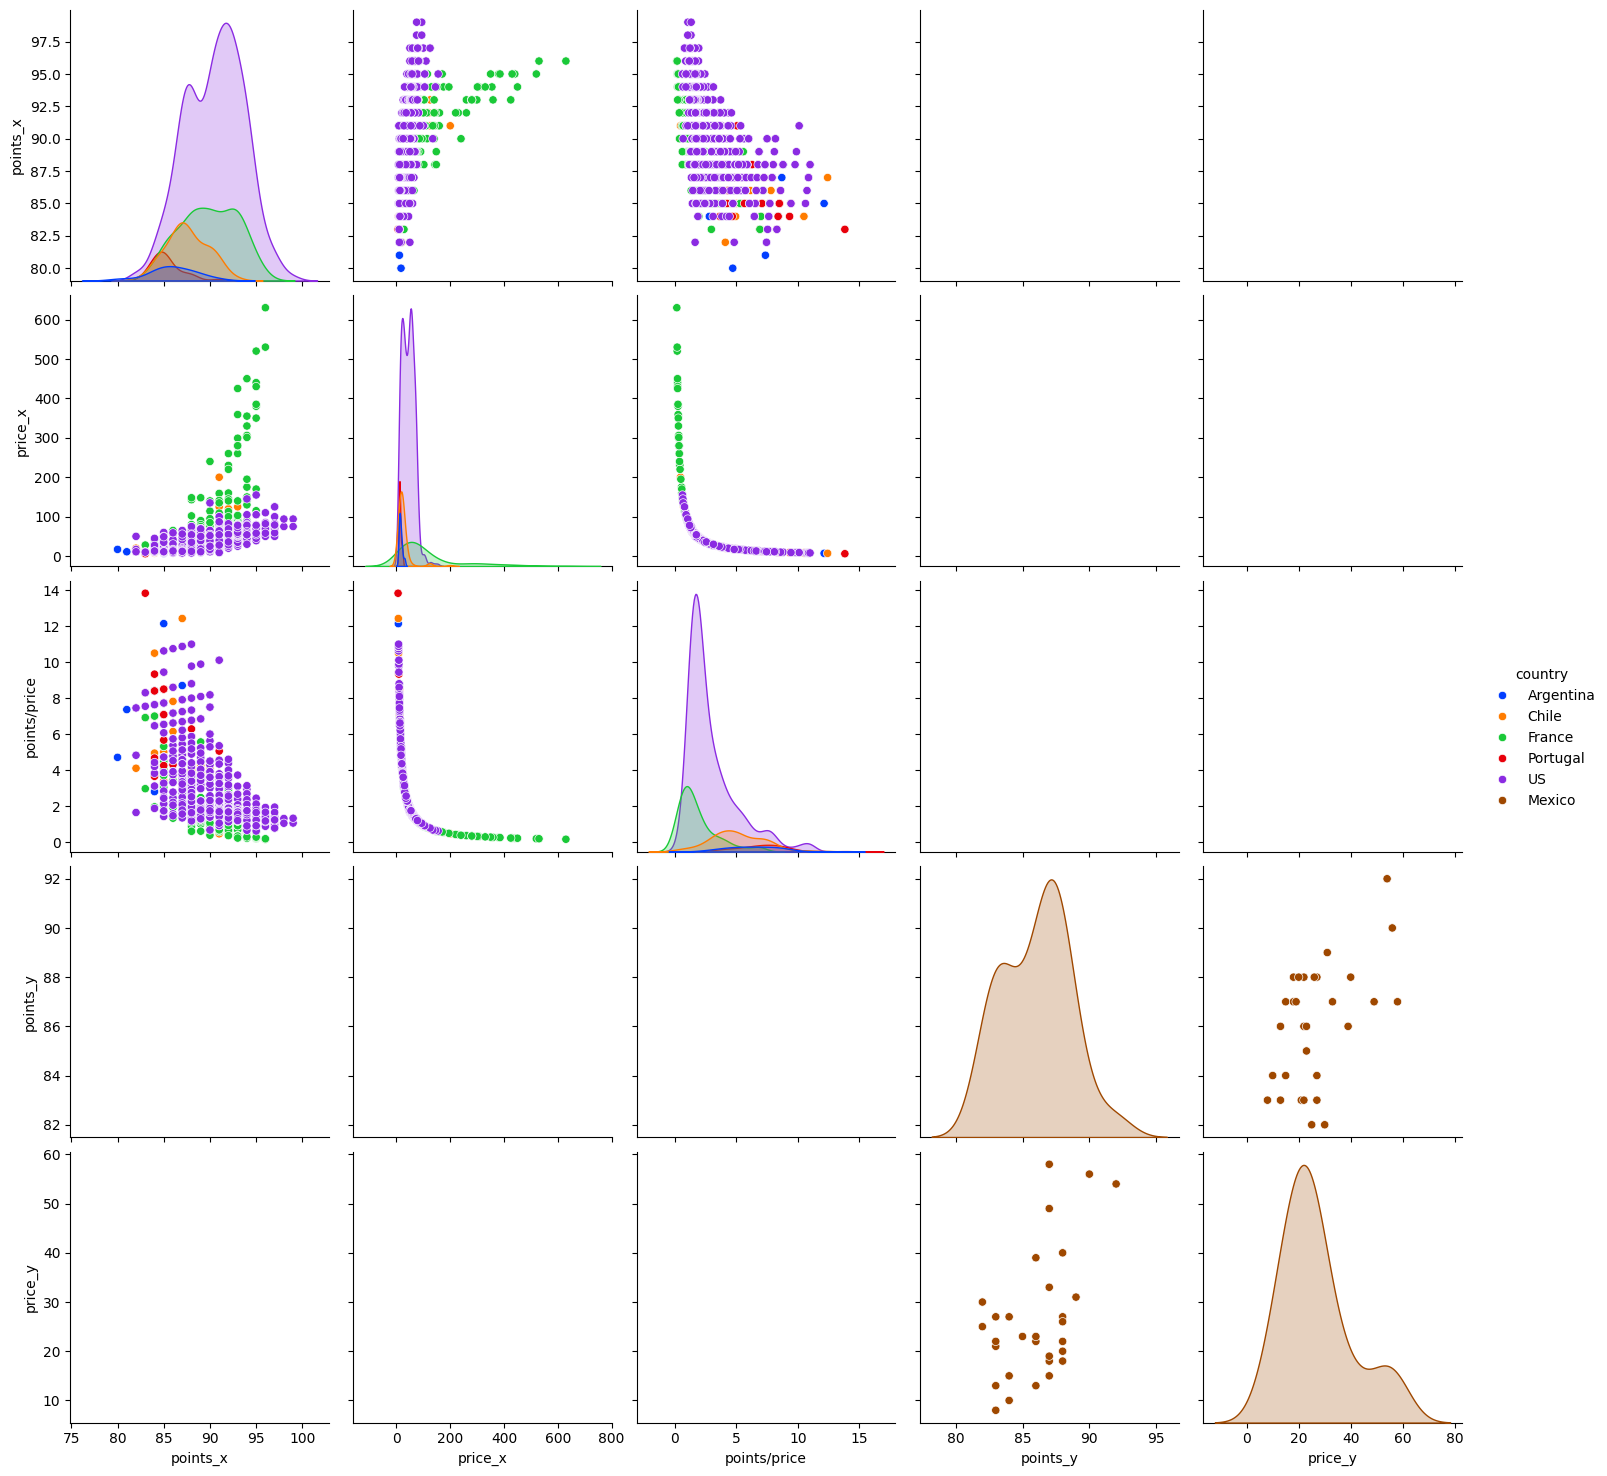

In [27]:
# Separar los datos de México del resto de los países
mx_data = df3[df3['country'] == 'Mexico']
non_mx_data = df3[df3['country'] != 'Mexico']

# Concatenar los datos no mexicanos con los datos de México al final
mx_top = pd.concat([non_mx_data, mx_data])

# Visualizar las distribuciones por pares en función del país
sns.pairplot(mx_top, hue="country", height=3, palette='bright')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos por país.

C:\Users\beyon\AppData\Local\Temp\ipykernel_16460\1166696235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points_x", data=df3, dodge=True, palette='deep', marker='*', size=8)


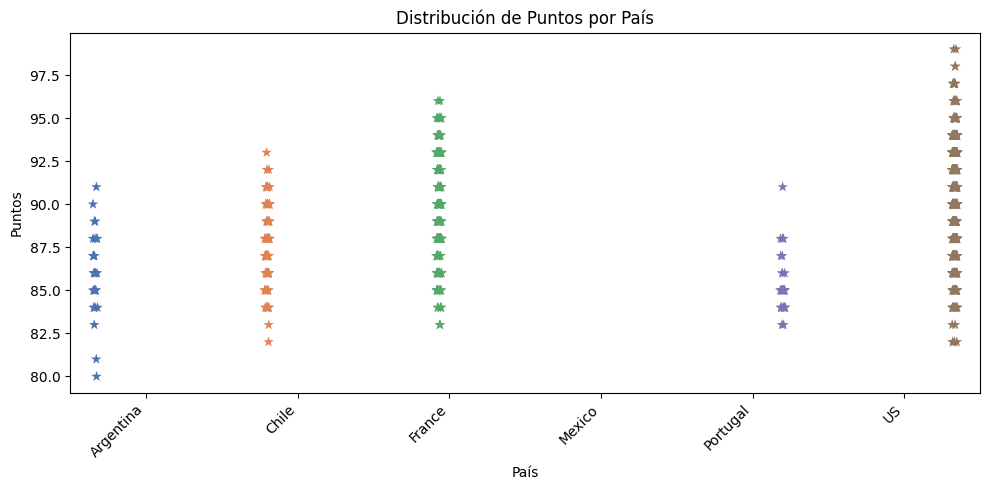

In [28]:
# Crear un gráfico de dispersión de puntos por país
plt.figure(figsize=(10, 5))
sns.stripplot(x="country", y="points_x", data=df3, dodge=True, palette='deep', marker='*', size=8)
plt.xticks(rotation=45, ha="right")
plt.xlabel('País')
plt.ylabel('Puntos')
plt.title('Distribución de Puntos por País')
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

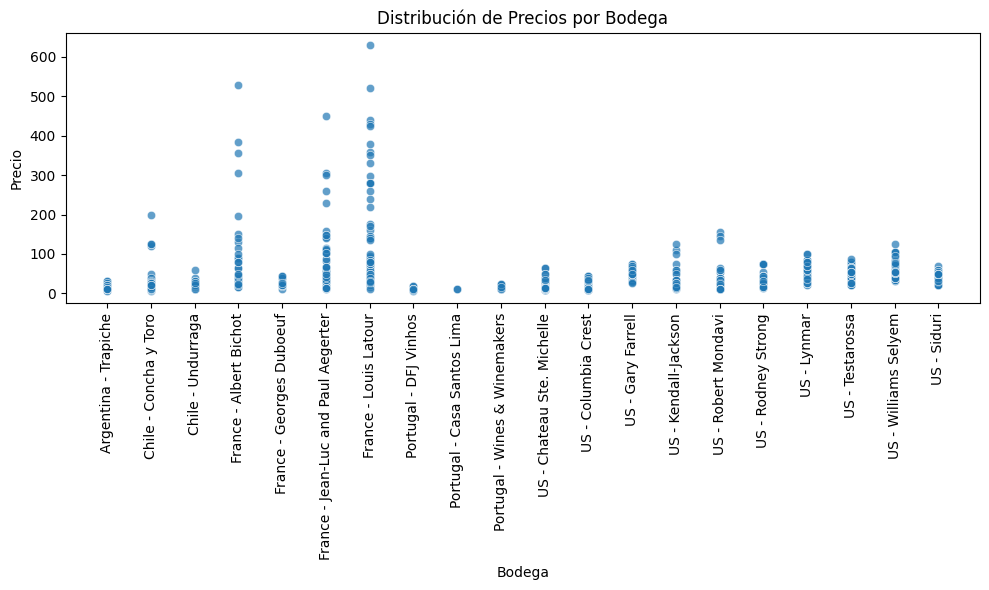

In [29]:
# Crear un gráfico de dispersión de precios por bodega
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mx_top, x='winery_x', y='price_x', alpha=0.7)
plt.xlabel('Bodega')
plt.ylabel('Precio')
plt.title('Distribución de Precios por Bodega')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [30]:
mx_top.head()

,country,winery_x,variety_x,points_x,price_x,points/price,winery_y,variety_y,points_y,price_y
0,Argentina,Argentina - Trapiche,Cabernet Sauvignon,84.0,10.0,8.400000,NaN,NaN,NaN,NaN
1,Argentina,Argentina - Trapiche,Cabernet Sauvignon,88.0,15.0,5.866667,NaN,NaN,NaN,NaN
2,Argentina,Argentina - Trapiche,Cabernet Sauvignon,90.0,15.0,6.000000,NaN,NaN,NaN,NaN
3,Argentina,Argentina - Trapiche,Cabernet Sauvignon,88.0,10.0,8.800000,NaN,NaN,NaN,NaN
4,Argentina,Argentina - Trapiche,Cabernet Sauvignon,91.0,30.0,3.033333,NaN,NaN,NaN,NaN


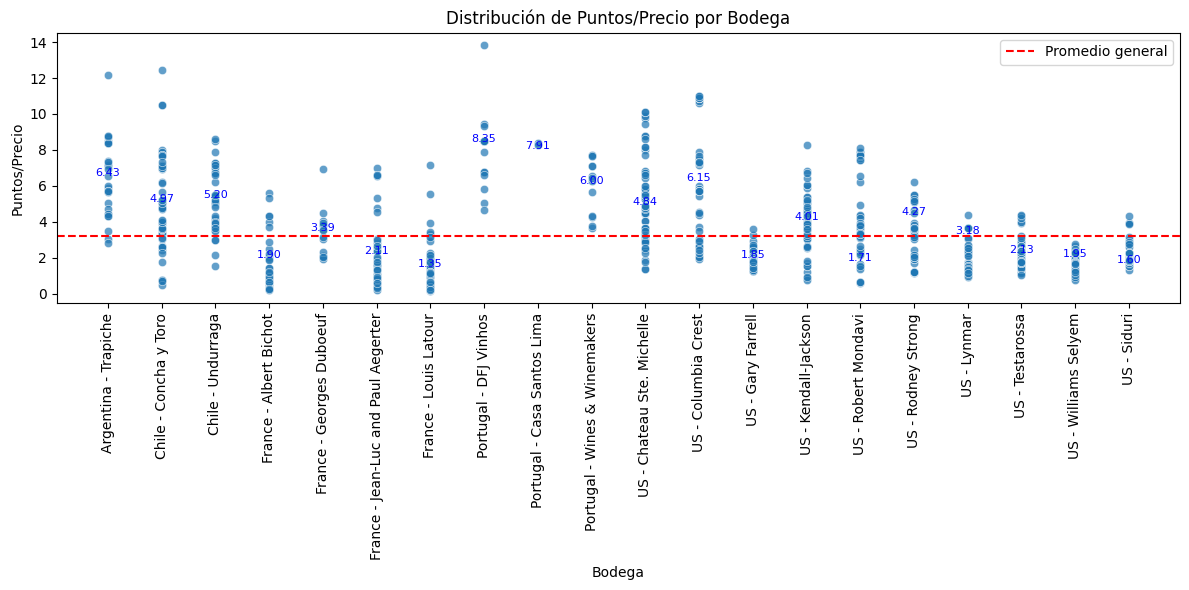

In [31]:
# Calcular los valores promedio por cada bodega
medias = mx_top.groupby(['country', 'winery_x'])['points/price'].mean().reset_index()

# Calcular el promedio de todos los datos
promedio_general = mx_top['points/price'].mean()

# Crear el gráfico de dispersión de puntos/precio por bodega
plt.figure(figsize=(12, 6))
sns.scatterplot(data=mx_top, x='winery_x', y='points/price', alpha=0.7)

# Dibujar una línea que marque el promedio de todos los datos
plt.axhline(y=promedio_general, color='r', linestyle='--', label='Promedio general')

# Dibujar marcas ubicando los valores promedio por cada bodega
for i in range(len(medias)):
    plt.text(i, medias.iloc[i]['points/price'], f"{medias.iloc[i]['points/price']:.2f}", ha='center', va='bottom', fontsize=8, color='blue')

plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')
plt.title('Distribución de Puntos/Precio por Bodega')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

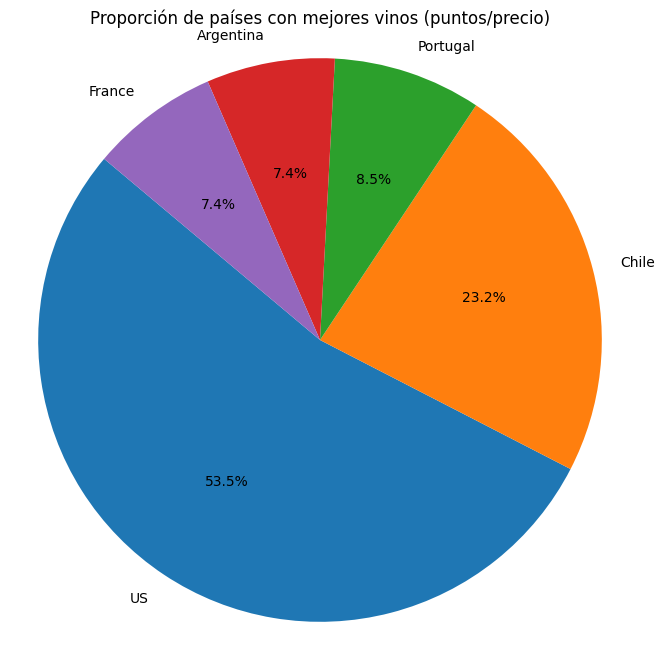

In [32]:
# Calcular el promedio general de puntos/precio
promedio_general = mx_top['points/price'].mean()

# Contar cuántos vinos de cada país están por encima del promedio general
mejores_vinos_por_pais = mx_top[mx_top['points/price'] > promedio_general]['country'].value_counts()

# Crear un gráfico de pastel para mostrar la proporción de países con mejores vinos
plt.figure(figsize=(8, 8))
plt.pie(mejores_vinos_por_pais, labels=mejores_vinos_por_pais.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de países con mejores vinos (puntos/precio)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


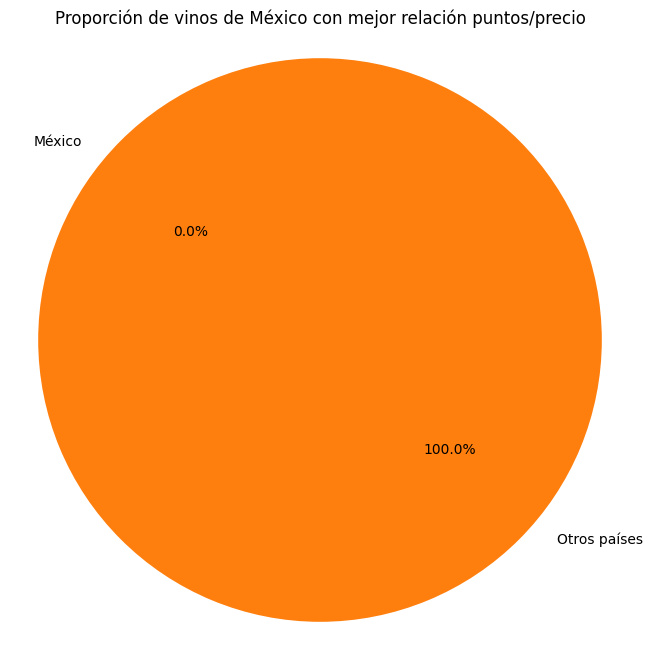

In [33]:
# Calcular el promedio general de puntos/precio
promedio_general = mx_top['points/price'].mean()

# Contar cuántos vinos de México están por encima del promedio general
mejores_vinos_mexico = (mx_top['country'] == 'Mexico') & (mx_top['points/price'] > promedio_general)

# Calcular la proporción de vinos de México con una relación puntos/precio por encima del promedio general
proporcion_mexico = len(mx_top[mejores_vinos_mexico]) / len(mx_top)

# Crear un gráfico de pastel para mostrar la proporción de vinos de México con mejor relación puntos/precio
plt.figure(figsize=(8, 8))
plt.pie([proporcion_mexico, 1 - proporcion_mexico], labels=['México', 'Otros países'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de vinos de México con mejor relación puntos/precio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
